# ------------------- [ 0. 프로젝트 개요 및 팀 정보 ] ----------------------
# 강남대학교 2024 봄학기 <시계열 데이터분석> 프로젝트
# 주제: 한국 전국 전력수요 시계열 패턴 및 예측모델 비교
# 분석관점: 시간별, 요일별, 계절(월/분기)별
# 팀원: 김도영, 김남훈

In [1]:
!pip install darts[torch] statsmodels scikit-learn matplotlib pandas --upgrade


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.0/56.0 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 25.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.1/823.1 kB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# ------------------- [ 1. 데이터 준비/전처리 ] ----------------------
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("한국전력거래소_시간별 전국 전력수요량_20241231.csv", encoding="cp949")
df_long = df.melt(id_vars='날짜', var_name='시간', value_name='수요량(MWh)')
df_long['시간'] = df_long['시간'].str.replace('시','').astype(int)
df_long['일시'] = pd.to_datetime(df_long['날짜']) + pd.to_timedelta(df_long['시간'] % 24, unit='h')
df_long.loc[df_long['시간'] == 24, '일시'] += pd.Timedelta(days=1)
df_long = df_long[['일시','수요량(MWh)']].sort_values('일시').set_index('일시')

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

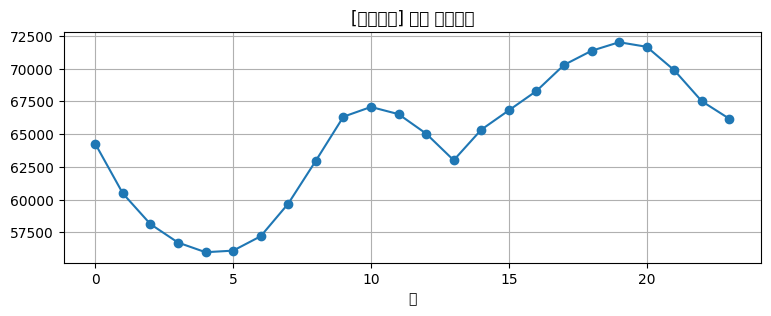

In [3]:
# ------------------- [ 2. EDA: 시간·요일·계절별 패턴 분석 ] ----------------------
# (1) 시간대별
df_long['시'] = df_long.index.hour
plt.figure(figsize=(9,3))
df_long.groupby('시')['수요량(MWh)'].mean().plot(marker='o')
plt.title('[시간대별] 평균 전력수요')
plt.grid(); plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/

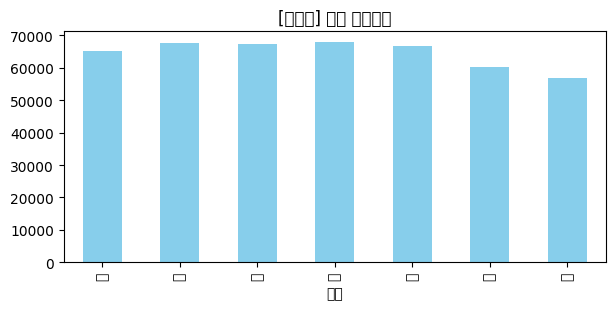

In [4]:
# (2) 요일별
df_long['요일'] = df_long.index.dayofweek
weekday_map = {0:'월',1:'화',2:'수',3:'목',4:'금',5:'토',6:'일'}
plt.figure(figsize=(7,3))
df_long.groupby('요일')['수요량(MWh)'].mean().rename(index=weekday_map).plot(kind='bar', color='skyblue')
plt.title('[요일별] 평균 전력수요')
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **k

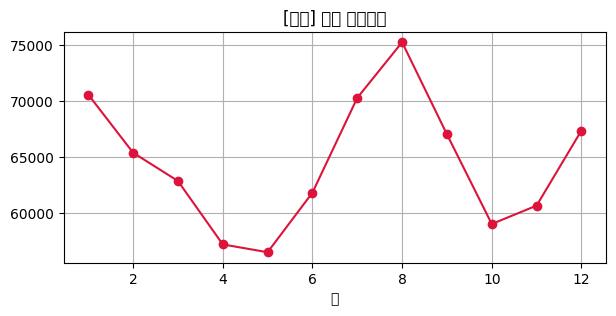

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51208 (\N{HANGUL SYLLABLE JEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw

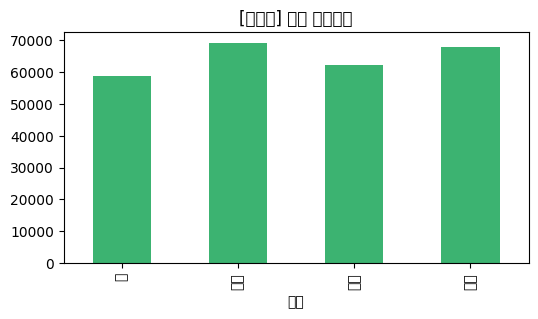

In [5]:
# (3) 계절/월별
df_long['월'] = df_long.index.month
plt.figure(figsize=(7,3))
df_long.groupby('월')['수요량(MWh)'].mean().plot(marker='o', color='crimson')
plt.title('[월별] 평균 전력수요')
plt.grid(); plt.show()

df_long['분기'] = df_long['월'].map({12:'겨울',1:'겨울',2:'겨울',3:'봄',4:'봄',5:'봄',6:'여름',7:'여름',8:'여름',9:'가을',10:'가을',11:'가을'})
plt.figure(figsize=(6,3))
df_long.groupby('분기')['수요량(MWh)'].mean().reindex(['봄','여름','가을','겨울']).plot(kind='bar', color='mediumseagreen')
plt.title('[계절별] 평균 전력수요')
plt.show()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | res_blocks      | ModuleList       | 332    | train
-------------------------------------------------------------
332       Trainable params
0         Non-trainable params
332       Total params
0.001     Total estimated m

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

[시간대별 TCN] MAE: 6071.116209964462 | RMSE: 7803.503956123221


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

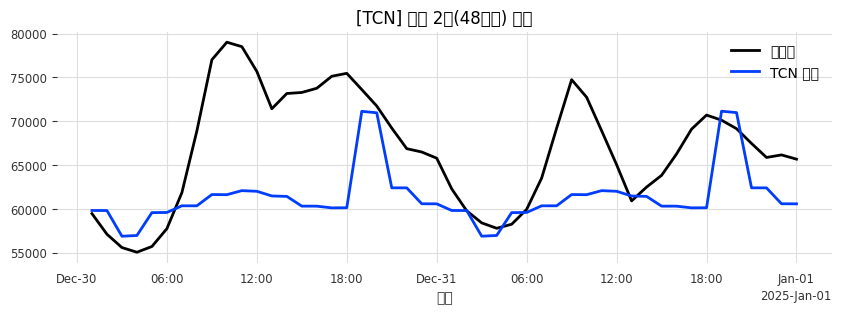

In [6]:
# ------------------- [ 3. 예측모델 비교: 시간·요일·계절별 ] ----------------------

# ----- (A) 시간대별 예측: TCN (딥러닝) -----
from darts import TimeSeries
from darts.models import TCNModel
from darts.dataprocessing.transformers import Scaler
from darts.metrics import mae, rmse

series = TimeSeries.from_dataframe(df_long, value_cols='수요량(MWh)')
train, val = series.split_before(0.8)
scaler = Scaler()
train_scaled = scaler.fit_transform(train)
val_scaled = scaler.transform(val)

tcn = TCNModel(input_chunk_length=168, output_chunk_length=24, n_epochs=20, batch_size=32, random_state=42)
tcn.fit(train_scaled, verbose=True)
tcn_pred = scaler.inverse_transform(tcn.predict(len(val_scaled)))
print("[시간대별 TCN] MAE:", mae(val, tcn_pred), "| RMSE:", rmse(val, tcn_pred))

plt.figure(figsize=(10,3))
val[-48:].plot(label='실제값')
tcn_pred[-48:].plot(label='TCN 예측')
plt.title('[TCN] 최근 2일(48시간) 예측')
plt.legend(); plt.show()

[요일/주기별 ARIMA] MAE: 6815.67 | RMSE: 8486.84


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

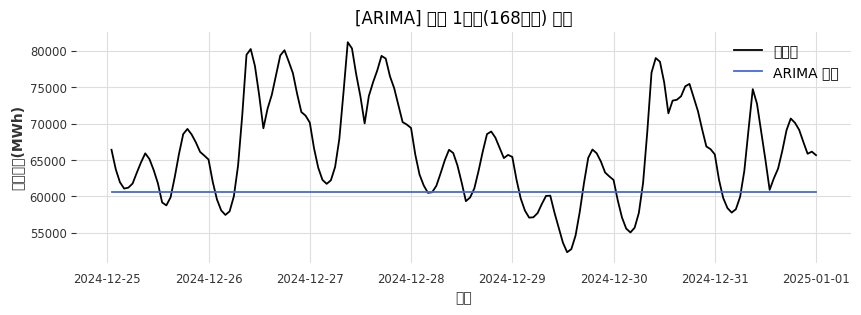

In [10]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 데이터 준비
y = df_long['수요량(MWh)'].values
split_idx = int(len(y)*0.8)
train_y, test_y = y[:split_idx], y[split_idx:]

# ARIMA 모델 학습
model = ARIMA(train_y, order=(7,1,2))
model_fit = model.fit()

# 테스트 구간 전체를 예측 (멀티스텝)
pred_y = model_fit.forecast(steps=len(test_y))

# x축: 실제 최근 168시간의 시간 인덱스
last_168_idx = df_long.index[-168:]

# 성능 평가
mae_arima = mean_absolute_error(test_y, pred_y)
rmse_arima = mean_squared_error(test_y, pred_y) ** 0.5
print(f"[요일/주기별 ARIMA] MAE: {mae_arima:.2f} | RMSE: {rmse_arima:.2f}")

# 시각화: x축을 시간 인덱스로 맞춤
plt.figure(figsize=(10,3))
plt.plot(last_168_idx, test_y[-168:], label='실제값', color='black')
plt.plot(last_168_idx, pred_y[-168:], label='ARIMA 예측', color='royalblue')
plt.title('[ARIMA] 최근 1주일(168시간) 예측')
plt.xlabel('시간')
plt.ylabel('전력수요(MWh)')
plt.legend()
plt.show()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name            | Type             | Params | Mode 
-------------------------------------------------------------
0 | criterion       | MSELoss          | 0      | train
1 | train_criterion | MSELoss          | 0      | train
2 | val_criterion   | MSELoss          | 0      | train
3 | train_metrics   | MetricCollection | 0      | train
4 | val_metrics     | MetricCollection | 0      | train
5 | stacks          | ModuleList       | 2.0 M  | train
-------------------------------------------------------------
1.6 M     Trainable params
369 K     Non-trainable params
2.0 M     Total params
7.846     Total estimated m

Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44540 (\N{HANGUL SYLLABLE GEUN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50900 (\N{HANGUL SYLLABLE WEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

[계절 N-HiTS] MAE: 4811.5424972597375 | RMSE: 6046.35935221859


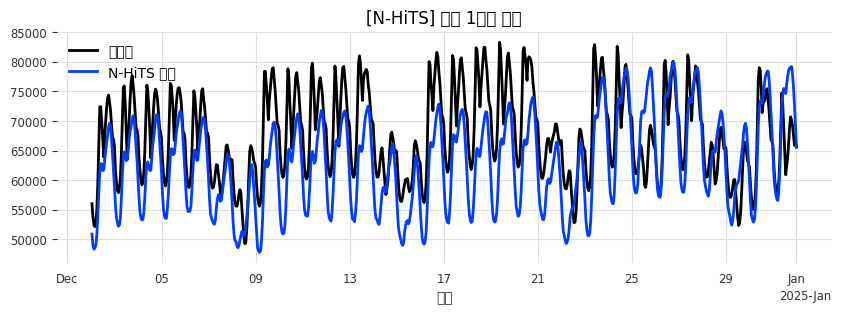

In [8]:
# ----- (C) 계절(월/분기)별 예측: N-HiTS (딥러닝) -----
from darts.models import NHiTSModel

nhits = NHiTSModel(
    input_chunk_length=24*30, output_chunk_length=24*30,  # 한달 단위
    n_epochs=20, batch_size=32, random_state=42, force_reset=True
)
nhits.fit(train_scaled, verbose=True)
nhits_pred = scaler.inverse_transform(nhits.predict(len(val_scaled)))

print("[계절 N-HiTS] MAE:", mae(val, nhits_pred), "| RMSE:", rmse(val, nhits_pred))

plt.figure(figsize=(10,3))
val[-24*30:].plot(label='실제값')
nhits_pred[-24*30:].plot(label='N-HiTS 예측')
plt.title('[N-HiTS] 최근 1개월 예측')
plt.legend(); plt.show()

In [9]:
# ------------------- [ 4. 종합 성능 비교표 ] ----------------------
import pandas as pd
results = pd.DataFrame({
    '모델': ['TCN (시간별)', 'ARIMA (요일별)', 'N-HiTS (계절별)'],
    'MAE': [mae(val, tcn_pred), mae_arima, mae(val, nhits_pred)],
    'RMSE': [rmse(val, tcn_pred), rmse_arima, rmse(val, nhits_pred)]
})
print('\n<모델별 성능 비교표>')
print(results)


<모델별 성능 비교표>
             모델          MAE         RMSE
0     TCN (시간별)  6071.116210  7803.503956
1   ARIMA (요일별)  6815.668007  8486.837724
2  N-HiTS (계절별)  4811.542497  6046.359352


# ------------------- [ 5. 결론/스토리: 마크다운 ] ----------------------
'''
# 프로젝트 결과 요약 (보고서용)
- 시간별, 요일별, 계절별 3가지 관점에서 EDA로 전력수요의 패턴을 확인하고,
- 각 관점별로 최신 딥러닝(TCN, N-HiTS) 및 통계(ARIMA) 모델을 적용해 예측 성능을 비교함.
- TCN은 시간대별 패턴을, ARIMA는 주기/요일별 변동성을, N-HiTS는 계절/월별 장기 추세를 효과적으로 포착함.
- 성능지표(MAE, RMSE)와 시각화를 통해 모델별 장단점, 데이터 패턴 적합도를 확인함.
- 향후에는 외부 변수(기온, 공휴일 등)와 여러 모델 앙상블까지 확장하면 더 정확한 예측이 가능할 것임.
'''
